# 0816124 林浩君

## Import modules

In [11]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

## 1. Data Input

In [12]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
req = requests.get(url)

pure_string = str(req.content).replace("b'","").split("\\n")
pure_string.pop()
pure_string.pop()

dataset = []
for line in pure_string:
    tmp = line.split(",")
    for i in range(4):
        tmp[i] = float(tmp[i])
    dataset.append(tmp)
    
dataset = pd.DataFrame(dataset)
dataset.columns = ["sepal length", "sepal width", "petal length", "petal width", "class"]
display(dataset)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 2. Data Visulization

Total: 


,sepal length,sepal width,petal length,petal width
mean,5.843333,3.054000,3.758667,1.198667
stdev,0.828066,0.433594,1.764420,0.763161


Iris-setosa: 


,sepal length,sepal width,petal length,petal width
mean,5.00600,3.418000,1.464000,0.24400
stdev,0.35249,0.381024,0.173511,0.10721


Iris-versicolor: 


,sepal length,sepal width,petal length,petal width
mean,5.936000,2.770000,4.260000,1.326000
stdev,0.516171,0.313798,0.469911,0.197753


Iris-virginica: 


,sepal length,sepal width,petal length,petal width
mean,6.58800,2.974000,5.552000,2.02600
stdev,0.63588,0.322497,0.551895,0.27465


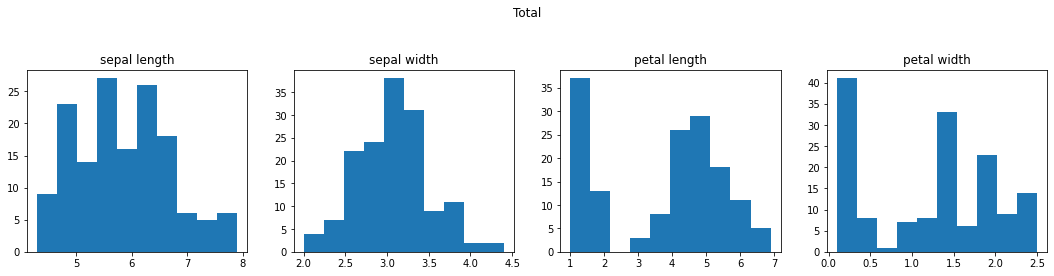

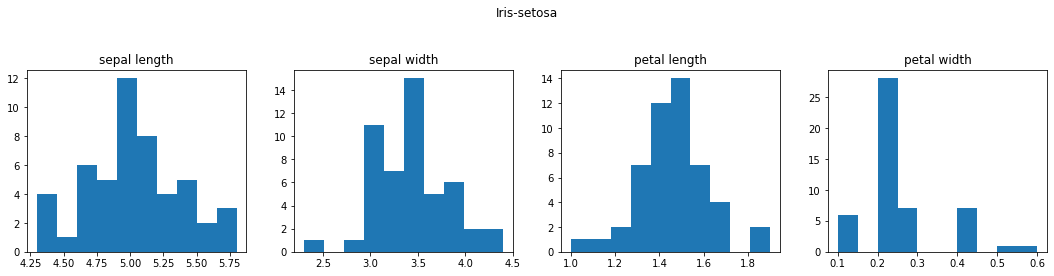

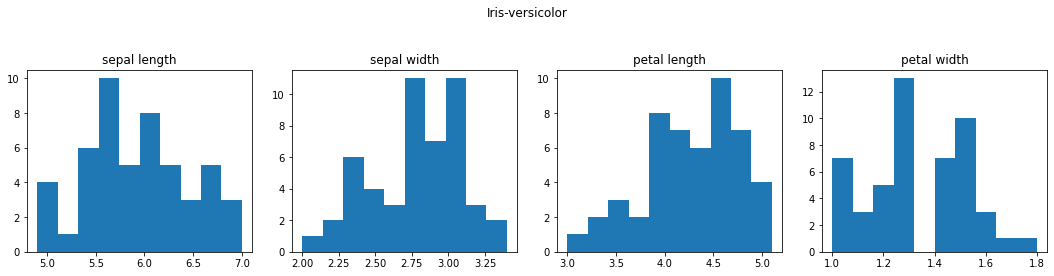

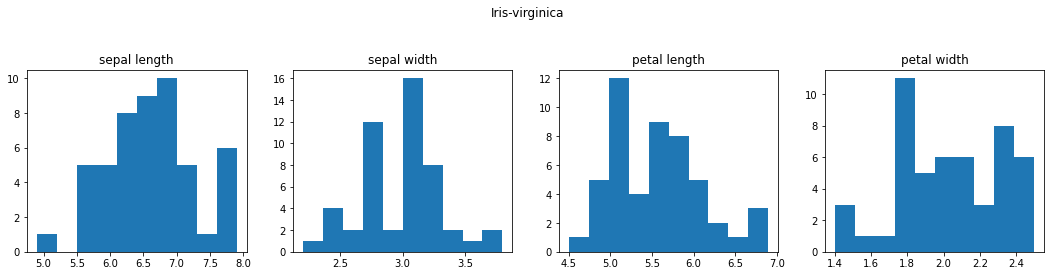

In [13]:
class_types = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
feature_types = ["sepal length", "sepal width", "petal length", "petal width"]

total = pd.DataFrame([list(dataset.mean()), list(dataset.std())])
total.columns  = feature_types
total.index = ["mean", "stdev"]

print("Total: ")
display(total)

fig, axs = plt.subplots(1,4)
fig.suptitle('Total')

for i in range(4):
    axs[i].hist(dataset[feature_types[i]])
    axs[i].set_title(feature_types[i])
fig.set_figwidth(15)
fig.tight_layout(pad=2.0)
plt.plot()

for class_type in class_types:
    target = dataset[dataset["class"] == class_type]
    total = pd.DataFrame([list(target.mean()), list(target.std())])
    total.columns  = feature_types
    total.index = ["mean", "stdev"]
    
    print(class_type+": ")
    display(total)
    
    fig, axs = plt.subplots(1,4)
    fig.suptitle(class_type)
    
    for i in range(4):
        axs[i].hist(target[feature_types[i]])
        axs[i].set_title(feature_types[i])

    fig.set_figwidth(15)
    fig.tight_layout(pad=2.0)
    plt.plot()

## 3. Data Preprocessing

In [14]:
from sklearn.utils import shuffle
dataset = shuffle(dataset)

display(dataset)

def sigmoid(x):
    sig = 1 / (1 + math.exp(-x))
    return sig

# softmax method
softmax_dataset = dataset.copy(deep=True)
for feature_type in feature_types:
    for idx in range(0,150):
        softmax_dataset[feature_type][idx] = np.exp(softmax_dataset[feature_type][idx])
        
for feature_type in feature_types:
    softmax_dataset[feature_type] =  softmax_dataset[feature_type] / softmax_dataset[feature_type].sum()

display(softmax_dataset)

,sepal length,sepal width,petal length,petal width,class
4,5.0,3.6,1.4,0.2,Iris-setosa
108,6.7,2.5,5.8,1.8,Iris-virginica
126,6.2,2.8,4.8,1.8,Iris-virginica
22,4.6,3.6,1.0,0.2,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa
...,...,...,...,...,...
136,6.3,3.4,5.6,2.4,Iris-virginica
79,5.7,2.6,3.5,1.0,Iris-versicolor
14,5.8,4.0,1.2,0.2,Iris-setosa
81,5.5,2.4,3.7,1.0,Iris-versicolor


<ipython-input-14-e18dd9b2c06f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  softmax_dataset[feature_type][idx] = np.exp(softmax_dataset[feature_type][idx])


,sepal length,sepal width,petal length,petal width,class
4,0.002008,0.010433,0.000210,0.001881,Iris-setosa
108,0.010994,0.003473,0.017133,0.009316,Iris-virginica
126,0.006668,0.004688,0.006303,0.009316,Iris-virginica
22,0.001346,0.010433,0.000141,0.001881,Iris-setosa
35,0.002008,0.006994,0.000172,0.001881,Iris-setosa
...,...,...,...,...,...
136,0.007369,0.008542,0.014027,0.016975,Iris-virginica
79,0.004044,0.003838,0.001718,0.004186,Iris-versicolor
14,0.004470,0.015565,0.000172,0.001881,Iris-setosa
81,0.003311,0.003142,0.002098,0.004186,Iris-versicolor


## 4. Model Construction

In [15]:
class Naive_Bayes_Classifier:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.class_types = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
        self.feature_types = ["sepal length", "sepal width", "petal length", "petal width"]
    
    def normpdf(self, xi, feature_type, class_type):
        mean = self.x[self.y == class_type].mean()[feature_type]
        std =  self.x[self.y == class_type].std()[feature_type]
        
        var = float(std)**2
        denom = (2*math.pi*var)**.5
        num = math.exp(-(float(xi)-float(mean))**2/(2*var))
        return float(num/denom)

    def naive_bayes(self, data, label):
        ans = math.log(len(y[y == label])/len(y))
        for feature_type in self.feature_types:
            ans = ans + math.log(self.normpdf(data[feature_type], feature_type, label) + 1e-8)
        return ans
    
    def predict(self, x):
        result = []
        for i in range(len(x)):
            tmp = []
            for class_type in self.class_types:
                tmp.append(self.naive_bayes(x.iloc[i],class_type))
            result.append(self.class_types[np.argmax(tmp)])
        return result
    
    def cal_confusion_matrix(self, x, y):
        result = self.predict(x)
        
        matrix = pd.DataFrame(np.zeros((3,3)))
        matrix.columns = class_types
        matrix.index = class_types
        
        for i in range(len(result)):
            matrix[result[i]][y.iloc[i]] = matrix[result[i]][y.iloc[i]] + 1
        
        return matrix
            

## 5. Train-Test-Split

In [16]:
x = dataset.iloc[:, :4]
y = dataset["class"]

x_training_set = x[: math.floor(len(x) * 0.7)]
y_training_set = y[: math.floor(len(y) * 0.7)]
x_validation_set = x[math.floor(len(x) * 0.7) :]
y_validation_set = y[math.floor(len(y) * 0.7) :]

print("Training data size: ", len(x_training_set))
print("Validation data size: ", len(x_validation_set))

x_K_fold_cross_validation = []
y_K_fold_cross_validation = []
for i in range(3):
    x_K_fold_cross_validation.append(x[math.floor(len(x) * 1/3 * i) : math.floor(len(x) * 1/3 * (i+1))])
    y_K_fold_cross_validation.append(y[math.floor(len(y) * 1/3 * i) : math.floor(len(y) * 1/3 * (i+1))])
    print("K_fold_cross_validation "+"size "+str(i+1)+" : ", len(x_K_fold_cross_validation[i]))
    
softmax_x = dataset.iloc[:, :4]
softmax_y = dataset["class"]

softmax_x_training_set = softmax_x[: math.floor(len(softmax_x) * 0.7)]
softmax_y_training_set = softmax_y[: math.floor(len(softmax_y) * 0.7)]
softmax_x_validation_set = softmax_x[math.floor(len(softmax_x) * 0.7) :]
softmax_y_validation_set = softmax_y[math.floor(len(softmax_y) * 0.7) :]

print("\nSoftmax Training data size: ", len(softmax_x_training_set))
print("Softmax Validation data size: ", len(softmax_x_validation_set))

softmax_x_K_fold_cross_validation = []
softmax_y_K_fold_cross_validation = []
for i in range(3):
    softmax_x_K_fold_cross_validation.append(softmax_x[math.floor(len(softmax_x) * 1/3 * i) : math.floor(len(softmax_x) * 1/3 * (i+1))])
    softmax_y_K_fold_cross_validation.append(softmax_y[math.floor(len(softmax_y) * 1/3 * i) : math.floor(len(softmax_y) * 1/3 * (i+1))])
    print("Softmax K_fold_cross_validation "+"size "+str(i+1)+" : ", len(softmax_x_K_fold_cross_validation[i]))

Training data size:  105
Validation data size:  45
K_fold_cross_validation size 1 :  50
K_fold_cross_validation size 2 :  50
K_fold_cross_validation size 3 :  50

Softmax Training data size:  105
Softmax Validation data size:  45
Softmax K_fold_cross_validation size 1 :  50
Softmax K_fold_cross_validation size 2 :  50
Softmax K_fold_cross_validation size 3 :  50


## Training

In [17]:
model = Naive_Bayes_Classifier(x_training_set, y_training_set)

holdout_confusion_matrix = model.cal_confusion_matrix(x_validation_set, y_validation_set)

k_fold_confusion_matrix = pd.DataFrame(np.zeros((3,3)))
k_fold_confusion_matrix.columns = class_types
k_fold_confusion_matrix.index = class_types

order = [[0, 1, 2], [2, 0, 1], [1, 2, 0]]
for i in range(3):
    print("k fold with laplace pridict round ", i)
    x_K_fold_cross_training_set = pd.concat([x_K_fold_cross_validation[order[i][0]],x_K_fold_cross_validation[order[i][1]]], axis=0)
    y_K_fold_cross_training_set = pd.concat([y_K_fold_cross_validation[order[i][0]],y_K_fold_cross_validation[order[i][1]]], axis=0)
    x_K_fold_cross_validation_set = x_K_fold_cross_validation[order[i][2]]
    y_K_fold_cross_validation_set = y_K_fold_cross_validation[order[i][2]]

    model = Naive_Bayes_Classifier(x_K_fold_cross_training_set, y_K_fold_cross_training_set)

    k_fold_confusion_matrix = k_fold_confusion_matrix + model.cal_confusion_matrix(x_K_fold_cross_validation_set, y_K_fold_cross_validation_set)
    

softmax_model = Naive_Bayes_Classifier(softmax_x_training_set, softmax_y_training_set)

softmax_holdout_confusion_matrix = model.cal_confusion_matrix(softmax_x_validation_set, softmax_y_validation_set)

softmax_k_fold_confusion_matrix = pd.DataFrame(np.zeros((3,3)))
softmax_k_fold_confusion_matrix.columns = class_types
softmax_k_fold_confusion_matrix.index = class_types

order = [[0, 1, 2], [2, 0, 1], [1, 2, 0]]
for i in range(3):
    print("softmax k fold with laplace pridict round ", i)
    softmax_x_K_fold_cross_training_set = pd.concat([softmax_x_K_fold_cross_validation[order[i][0]],softmax_x_K_fold_cross_validation[order[i][1]]], axis=0)
    softmax_y_K_fold_cross_training_set = pd.concat([softmax_y_K_fold_cross_validation[order[i][0]],softmax_y_K_fold_cross_validation[order[i][1]]], axis=0)
    softmax_x_K_fold_cross_validation_set = softmax_x_K_fold_cross_validation[order[i][2]]
    softmax_y_K_fold_cross_validation_set = softmax_y_K_fold_cross_validation[order[i][2]]

    softmax_model = Naive_Bayes_Classifier(softmax_x_K_fold_cross_training_set, softmax_y_K_fold_cross_training_set)

    softmax_k_fold_confusion_matrix = softmax_k_fold_confusion_matrix + model.cal_confusion_matrix(softmax_x_K_fold_cross_validation_set, softmax_y_K_fold_cross_validation_set)

k fold with laplace pridict round  0
k fold with laplace pridict round  1
k fold with laplace pridict round  2
softmax k fold with laplace pridict round  0
softmax k fold with laplace pridict round  1
softmax k fold with laplace pridict round  2


## 6. Result

In [18]:
def calculate_summary(matrix):
    summary = pd.DataFrame(np.zeros((4,3)))
    summary.columns = ["Accuracy", "Precision", "Sensitivity"]
    summary.index = class_types + ["Average"]
    for class_type in class_types:
        TP = FP = FN = TN = 0
        for i in range(3):
            for j in range(3):
                if(class_types[i] == class_type and i == j):
                    TP = TP + matrix[class_types[i]][class_types[j]]
                elif(class_types[i] == class_type):
                    FN = FN + matrix[class_types[i]][class_types[j]]
                elif(class_types[j] == class_type):
                    FP = FP + matrix[class_types[i]][class_types[j]]
                else:
                    TN = TN + matrix[class_types[i]][class_types[j]]
        summary["Accuracy"][class_type] = (TP+TN)/(TP+FP+FN+TN)
        summary["Precision"][class_type] = TP/(TP+FP)
        summary["Sensitivity"][class_type] = TP/(TP+FN)

    summary.iloc[3] = summary.sum()/3
    return summary

print("Holdout: ")
display(holdout_confusion_matrix)

print("\nSummary of holdout: ")

holdout_summary = calculate_summary(holdout_confusion_matrix)
display(holdout_summary)
            
print("\nK-fold: ")
display(k_fold_confusion_matrix)

print("\nSummary of K-fold: ")

k_fold_summary = calculate_summary(k_fold_confusion_matrix)
display(k_fold_summary)

print("Softmax Holdout: ")
display(softmax_holdout_confusion_matrix)

print("\nSummary of softmax holdout: ")

softmax_holdout_summary = calculate_summary(softmax_holdout_confusion_matrix)
display(softmax_holdout_summary)
            
print("\nSoftmax K-fold: ")
display(softmax_k_fold_confusion_matrix)

print("\nSummary of softmax K-fold: ")

softmax_k_fold_summary = calculate_summary(softmax_k_fold_confusion_matrix)
display(softmax_k_fold_summary)

Holdout: 


,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,17.0,0.0,0.0
Iris-versicolor,0.0,13.0,0.0
Iris-virginica,0.0,0.0,15.0



Summary of holdout: 


,Accuracy,Precision,Sensitivity
Iris-setosa,1.0,1.0,1.0
Iris-versicolor,1.0,1.0,1.0
Iris-virginica,1.0,1.0,1.0
Average,1.0,1.0,1.0



K-fold: 


,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,50.0,0.0,0.0
Iris-versicolor,0.0,48.0,2.0
Iris-virginica,0.0,4.0,46.0



Summary of K-fold: 


,Accuracy,Precision,Sensitivity
Iris-setosa,1.000000,1.00,1.000000
Iris-versicolor,0.960000,0.96,0.923077
Iris-virginica,0.960000,0.92,0.958333
Average,0.973333,0.96,0.960470


Softmax Holdout: 


,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,17.0,0.0,0.0
Iris-versicolor,0.0,13.0,0.0
Iris-virginica,0.0,0.0,15.0



Summary of softmax holdout: 


,Accuracy,Precision,Sensitivity
Iris-setosa,1.0,1.0,1.0
Iris-versicolor,1.0,1.0,1.0
Iris-virginica,1.0,1.0,1.0
Average,1.0,1.0,1.0



Softmax K-fold: 


,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,50.0,0.0,0.0
Iris-versicolor,0.0,48.0,2.0
Iris-virginica,0.0,4.0,46.0



Summary of softmax K-fold: 


,Accuracy,Precision,Sensitivity
Iris-setosa,1.000000,1.00,1.000000
Iris-versicolor,0.960000,0.96,0.923077
Iris-virginica,0.960000,0.92,0.958333
Average,0.973333,0.96,0.960470


In [19]:
total_summary = pd.DataFrame(np.zeros((4,3)))
total_summary.columns = ["Accuracy", "Precision", "Sensitivity"]
total_summary.index = ["holdout", "k-fold", "holdout softmax", "k-fold softmax"]
total_summary.iloc[0] = holdout_summary.iloc[3]
total_summary.iloc[1] = k_fold_summary.iloc[3]
total_summary.iloc[2] = softmax_holdout_summary.iloc[3]
total_summary.iloc[3] = softmax_k_fold_summary.iloc[3]
display(total_summary)

,Accuracy,Precision,Sensitivity
holdout,1.000000,1.00,1.00000
k-fold,0.973333,0.96,0.96047
holdout softmax,1.000000,1.00,1.00000
k-fold softmax,0.973333,0.96,0.96047


## 8. Question

Question 1: 
 mean: 4.26
 std: 0.46991097723995806

Question 2: 


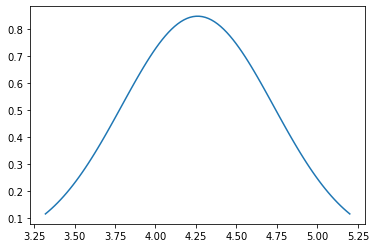

In [20]:
mean = x[y == "Iris-versicolor"]["petal length"].mean()
std =  x[y == "Iris-versicolor"]["petal length"].std()
print("Question 1: ")
print(" mean:", mean)
print(" std:", std)

def normpdf(mean, std, x):
    var = float(std)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

x_axis = np.linspace(mean-2*std, mean+2*std, 100)
y_axis = []
for number in x_axis:
    y_axis.append(normpdf(mean, std, number))

print("\nQuestion 2: ")
l = plt.plot(x_axis, y_axis)
